This notebook evaluates the HMM model and visualizes its probability distributions.

Input:
- `/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/models/hmm-L-100-h-100-e-100.pkl`

In [ ]:
import pickle
from hmmlearn.hmm import CategoricalHMM


model_filename = "/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/models/hmm-L-100-h-100-e-100.pkl"
with open(model_filename, 'rb') as file:
	# introducing types to get the intellisense to work
	model: CategoricalHMM = pickle.load(file)

In [29]:
# import the tokenizer as well to show the emission probabilities
import json

tokenizer_filename = "/n/netscratch/sham_lab/Everyone/jchooi/in-context-language-learning/data/tokenizer.json"
with open(tokenizer_filename, 'rb') as file:
    tokenizer = json.load(file)

# gets word given index
decoder_array = ['-1'] * len(tokenizer)
for k, v in tokenizer.items():
    decoder_array[v] = k
assert '-1' not in decoder_array

In [4]:
# let's get the stationary distribution of the hidden states
stationary_distribution = model.get_stationary_distribution()
stationary_distribution

array([0.00383568, 0.01815126, 0.0150011 , 0.02685823, 0.00171701,
       0.00972842, 0.00129482, 0.01081691, 0.00307961, 0.00333656,
       0.01487808, 0.03639209, 0.00210441, 0.02979856, 0.01699334,
       0.00213219, 0.02783529, 0.01880087, 0.00489077, 0.00628504,
       0.00159171, 0.0024162 , 0.00534027, 0.00043549, 0.00908987,
       0.00969813, 0.00756055, 0.00547701, 0.03280555, 0.00335826,
       0.00819877, 0.00301264, 0.00679027, 0.00384172, 0.0425283 ,
       0.0664824 , 0.00421877, 0.00719917, 0.00179752, 0.01391256,
       0.01829912, 0.00688596, 0.00104647, 0.00031763, 0.00162623,
       0.0174497 , 0.00100365, 0.00277968, 0.00195837, 0.00202472,
       0.00672958, 0.00278233, 0.01281879, 0.05777864, 0.00946801,
       0.00286618, 0.01088548, 0.0018131 , 0.00319954, 0.00515352,
       0.00452636, 0.00267098, 0.00090465, 0.00739791, 0.00297242,
       0.00492033, 0.00539833, 0.00346262, 0.00947946, 0.0283786 ,
       0.00118273, 0.00592046, 0.00302687, 0.00202335, 0.01872

In [5]:
import numpy as np

# Get the indices of the top 10 values
top_10_indices = np.argsort(stationary_distribution)[-10:][::-1]
print(top_10_indices)

[35 53 34 11 28 79 13 69 16 95]


In [31]:
import matplotlib.pyplot as plt

def visualize_emissionprob(emissionprob, idex=0, decoder_array=None):
    # idex is just for title
    # Visualize the PMF
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(emissionprob)), emissionprob, color='blue')
    plt.xlabel('Emission Index')
    plt.ylabel('Probability')
    plt.title(f'Probability Mass Function (PMF) of Emissions for Hidden State {idex}')
    
    # Annotate the top 3 highest emission probabilities
    if decoder_array is not None:
        top_3_indices = np.argsort(emissionprob)[-3:][::-1]
        for i in top_3_indices:
            plt.text(i, emissionprob[i], decoder_array[i], ha='center', va='bottom', color='red')
    
    plt.show()

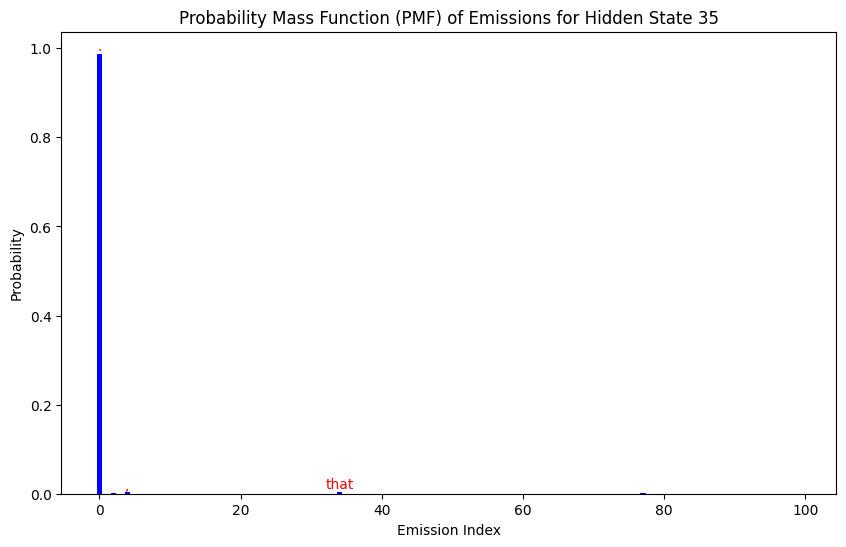

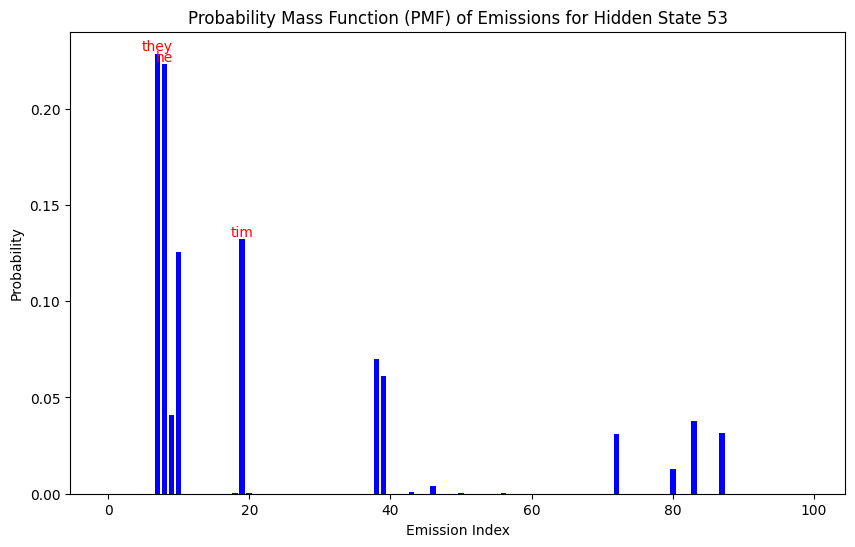

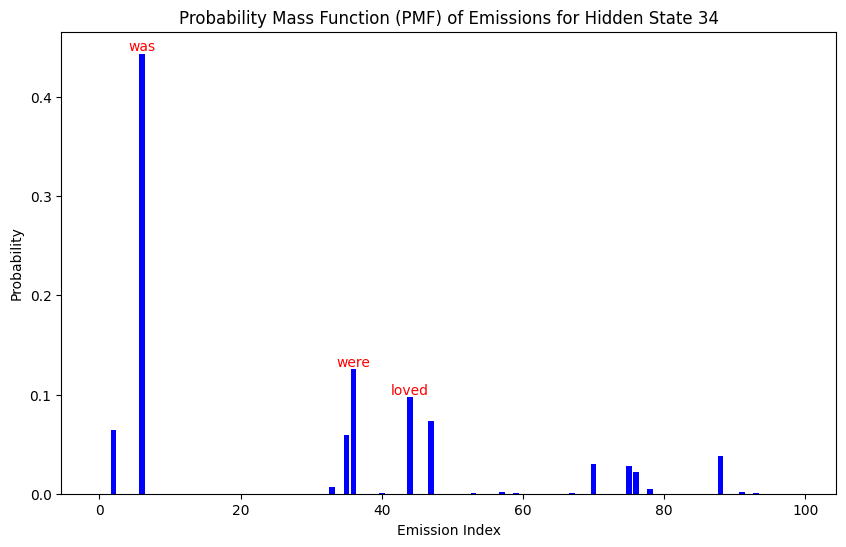

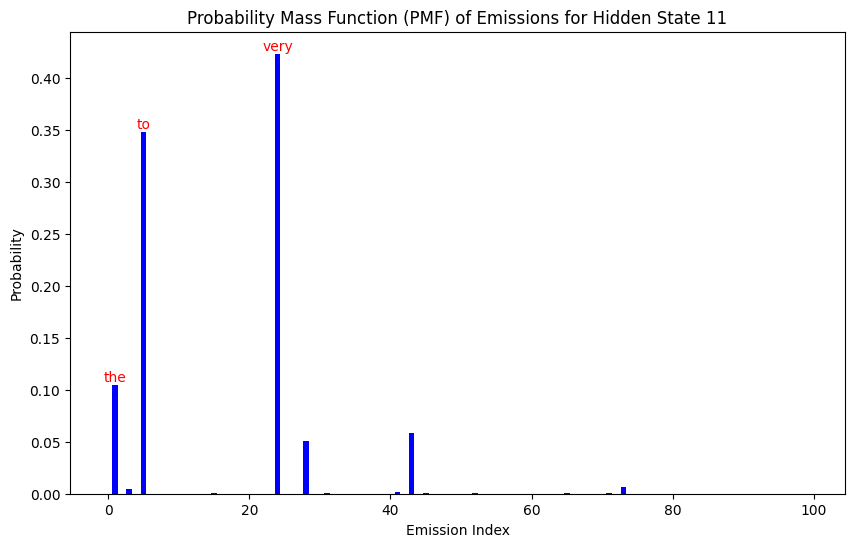

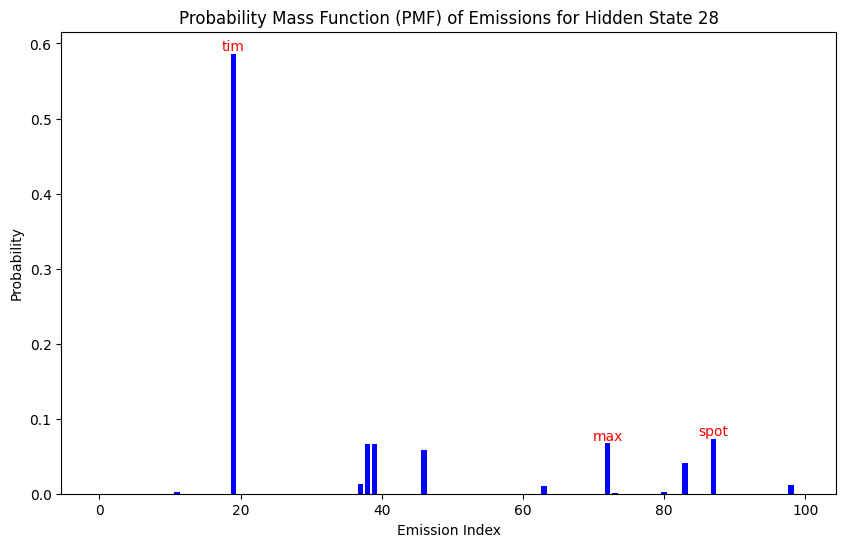

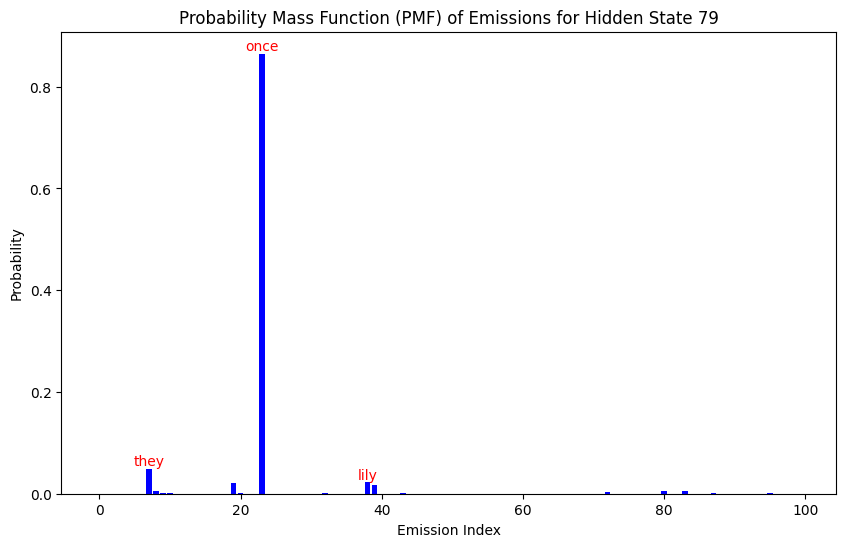

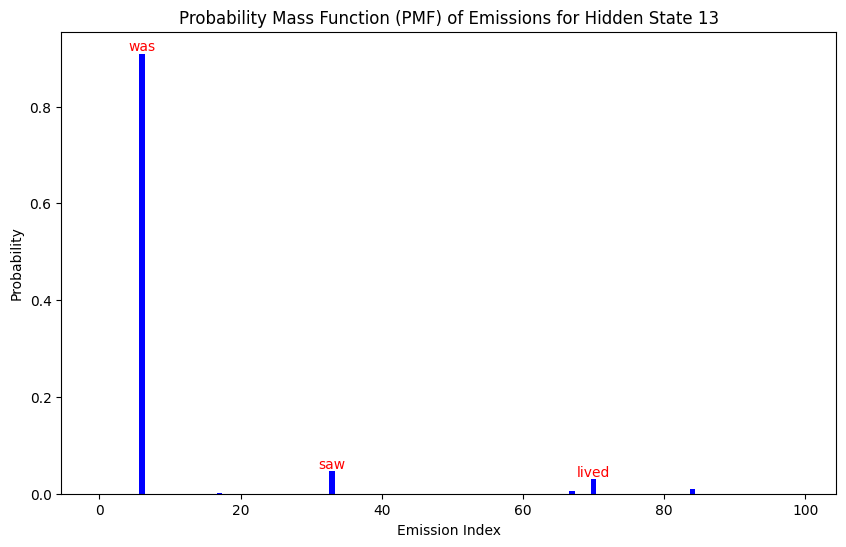

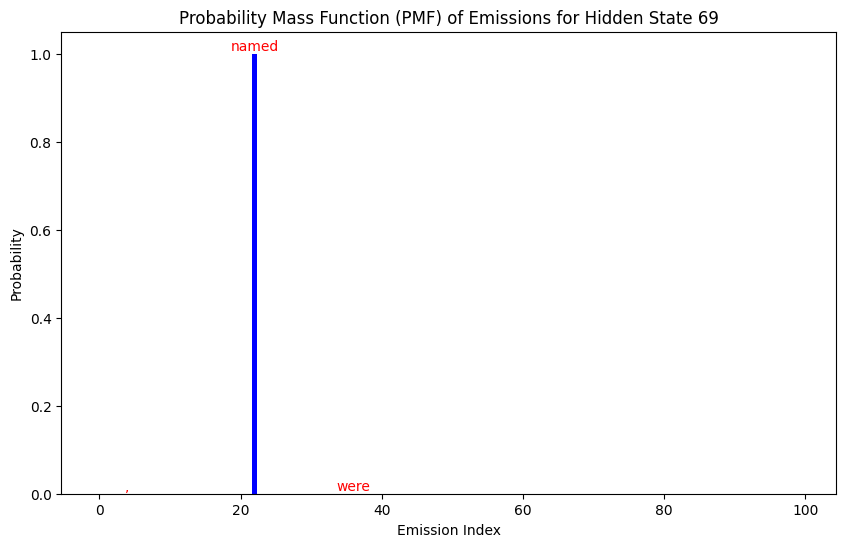

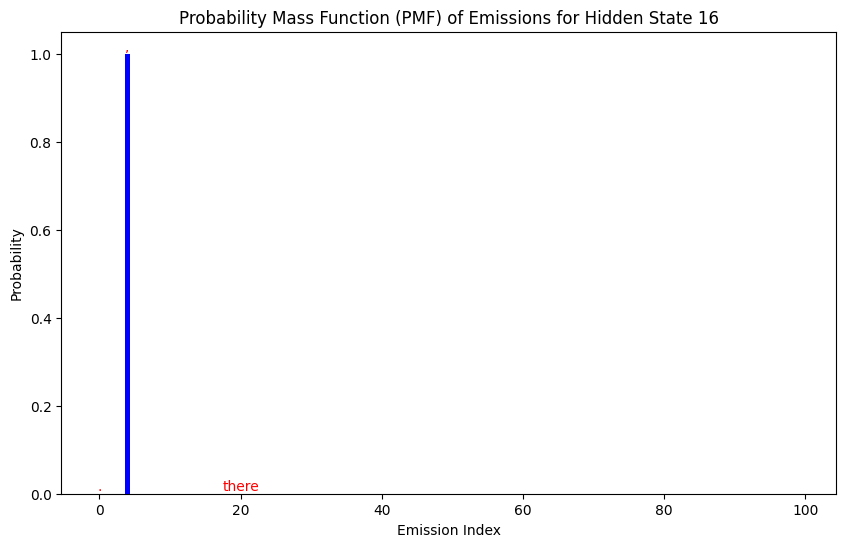

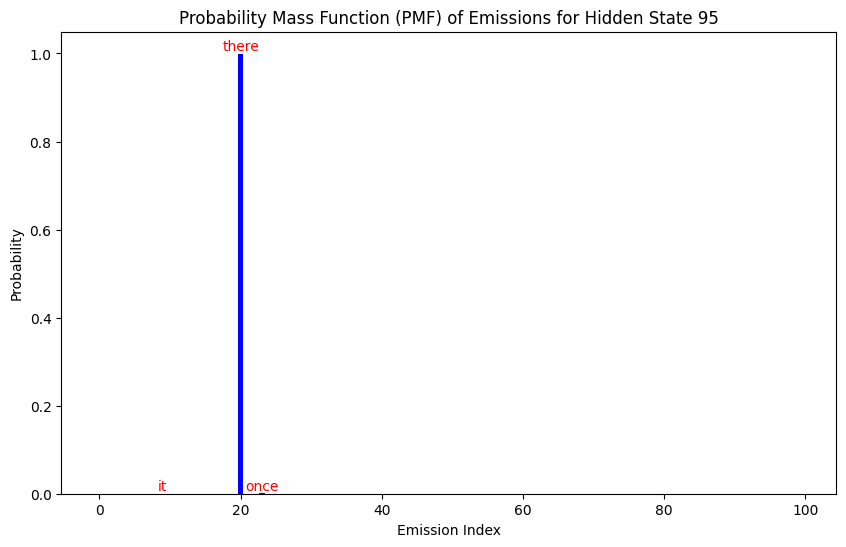

In [33]:
for hidden_state_idex in top_10_indices:
    visualize_emissionprob(
        emissionprob=model.emissionprob_[hidden_state_idex], idex=hidden_state_idex, decoder_array=decoder_array
    )

In [57]:
def generate_emissions(length=50):
    feature_matrix, state_sequence = model.sample(n_samples=length)
    # remove the 1D wrapper
    feature_matrix = feature_matrix.squeeze(1)
    return feature_matrix

def generate_text(length=50):
    emissions = generate_emissions(length)
    text = ' '.join([decoder_array[token] for token in emissions])
    return text

In [60]:
print(generate_text(1000))

named tim . once upon a time , there was a little boy named tim . they was up tree wanted happy . one day , little . to the park . she loved it too . little in a small tree , there was a little boy named toys . tom wanted sue small dog playing in the park . tom was to park . one day , a little tree in to happy . the played together new day . one day , she in to the other . spot is to happy . one day , big boy with his play in to play with that ball . once upon a time , there was a little dog named tim . once and tim lived sad together . lily was a fun . they had very . it wanted to play with help bird . they were to play with they played park every together . he is to . they played sad play with a toy . little cat was so sad and felt their his looked . tom wanted not happy . spot played together every day . they wanted to see a small with with ball every together . he was to park with his friends . tim wanted happy play ball make and to the park with his max . max loved the happy . one